# Session 5

Regression modeling
- sd

## Modelling case

We utilize the <a href="https://www.kaggle.com/prevek18/ames-housing-dataset">Ames Housing Dataset</a>, a popular learning dataset from Kaggle.

Analytical Objectives:<br>
a) Make a prediction for the sale price of each home, which is assumed to be a continuous variable.<br>
b) Identify key features that impact sale price.

## Dataset exploration

In [48]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# specifying file name
file = 'data/Ames Housing Dataset.xlsx'

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading the file into Python
housing = pd.read_excel(file)


# outputting the first ten rows of the dataset
housing.head(n = 10)

,Order,Lot_Area,Street,Lot_Config,Neighborhood,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Garage_Area,Porch_Area,Pool_Area,Sale_Price
0,1,31770,Pave,Corner,NAmes,6,5,112.0,1080.0,1656,0,1656,1,0,1,7,2,2.0,528.0,272,0,215000
1,2,11622,Pave,Inside,NAmes,5,6,0.0,882.0,896,0,896,1,0,1,5,0,1.0,730.0,260,0,105000
2,3,14267,Pave,Corner,NAmes,6,6,108.0,1329.0,1329,0,1329,1,1,1,6,0,1.0,312.0,429,0,172000
3,4,11160,Pave,Corner,NAmes,7,5,0.0,2110.0,2110,0,2110,2,1,1,8,2,2.0,522.0,0,0,244000
4,5,13830,Pave,Inside,Gilbert,5,5,0.0,928.0,928,701,1629,2,1,1,6,1,2.0,482.0,246,0,189900
5,6,9978,Pave,Inside,Gilbert,6,6,20.0,926.0,926,678,1604,2,1,1,7,1,2.0,470.0,396,0,195500
6,7,4920,Pave,Inside,StoneBr,8,5,0.0,1338.0,1338,0,1338,2,0,1,6,0,2.0,582.0,170,0,213500
7,8,5005,Pave,Inside,StoneBr,8,5,0.0,1280.0,1280,0,1280,2,0,1,5,0,2.0,506.0,226,0,191500
8,9,5389,Pave,Inside,StoneBr,8,5,0.0,1595.0,1616,0,1616,2,0,1,5,1,2.0,608.0,389,0,236500
9,10,7500,Pave,Inside,Gilbert,7,5,0.0,994.0,1028,776,1804,2,1,1,7,1,2.0,442.0,200,0,189000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   Lot_Area       2930 non-null   int64  
 2   Street         2930 non-null   object 
 3   Lot_Config     2930 non-null   object 
 4   Neighborhood   2930 non-null   object 
 5   Overall_Qual   2930 non-null   int64  
 6   Overall_Cond   2930 non-null   int64  
 7   Mas_Vnr_Area   2907 non-null   float64
 8   Total_Bsmt_SF  2929 non-null   float64
 9   First_Flr_SF   2930 non-null   int64  
 10  Second_Flr_SF  2930 non-null   int64  
 11  Gr_Liv_Area    2930 non-null   int64  
 12  Full_Bath      2930 non-null   int64  
 13  Half_Bath      2930 non-null   int64  
 14  Kitchen_AbvGr  2930 non-null   int64  
 15  TotRms_AbvGr   2930 non-null   int64  
 16  Fireplaces     2930 non-null   int64  
 17  Garage_Cars    2929 non-null   float64
 18  Garage_A

In [5]:
housing.describe(include='all')

,Order,Lot_Area,Street,Lot_Config,Neighborhood,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Garage_Area,Porch_Area,Pool_Area,Sale_Price
count,2930.00000,2930.000000,2930,2930,2930,2930.000000,2930.000000,2907.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000
unique,NaN,NaN,2,5,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Pave,Inside,NAmes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2918,2140,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1465.50000,10147.921843,NaN,NaN,NaN,6.094881,5.563140,101.896801,1051.614544,1159.557679,335.455973,1499.690444,1.566553,0.379522,1.044369,6.443003,0.599317,1.766815,472.819734,182.891468,2.243345,180796.060068
std,845.96247,7880.017759,NaN,NaN,NaN,1.411026,1.111537,179.112611,440.615067,391.890885,428.395715,505.508887,0.552941,0.502629,0.214076,1.572964,0.647921,0.760566,215.046549,159.834420,35.597181,79886.692357
min,1.00000,1300.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,733.25000,7440.250000,NaN,NaN,NaN,5.000000,5.000000,0.000000,793.000000,876.250000,0.000000,1126.000000,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000,320.000000,48.000000,0.000000,129500.000000
50%,1465.50000,9436.500000,NaN,NaN,NaN,6.000000,5.000000,0.000000,990.000000,1084.000000,0.000000,1442.000000,2.000000,0.000000,1.000000,6.000000,1.000000,2.000000,480.000000,165.000000,0.000000,160000.000000
75%,2197.75000,11555.250000,NaN,NaN,NaN,7.000000,6.000000,164.000000,1302.000000,1384.000000,703.750000,1742.750000,2.000000,1.000000,1.000000,7.000000,1.000000,2.000000,576.000000,266.000000,0.000000,213500.000000


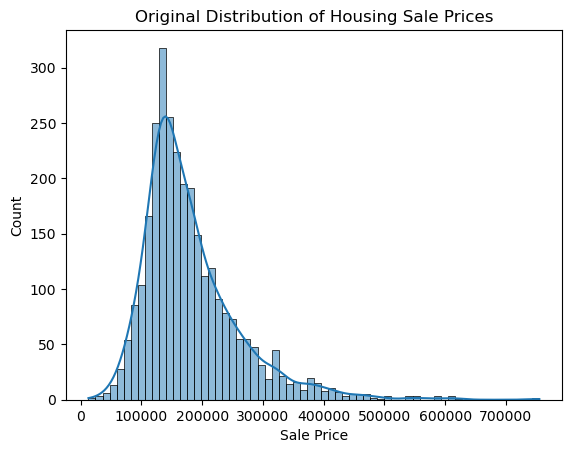

In [8]:
# developing a histogram using HISTPLOT
sns.histplot(data   = housing,
             x      = 'Sale_Price',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "Sale Price") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

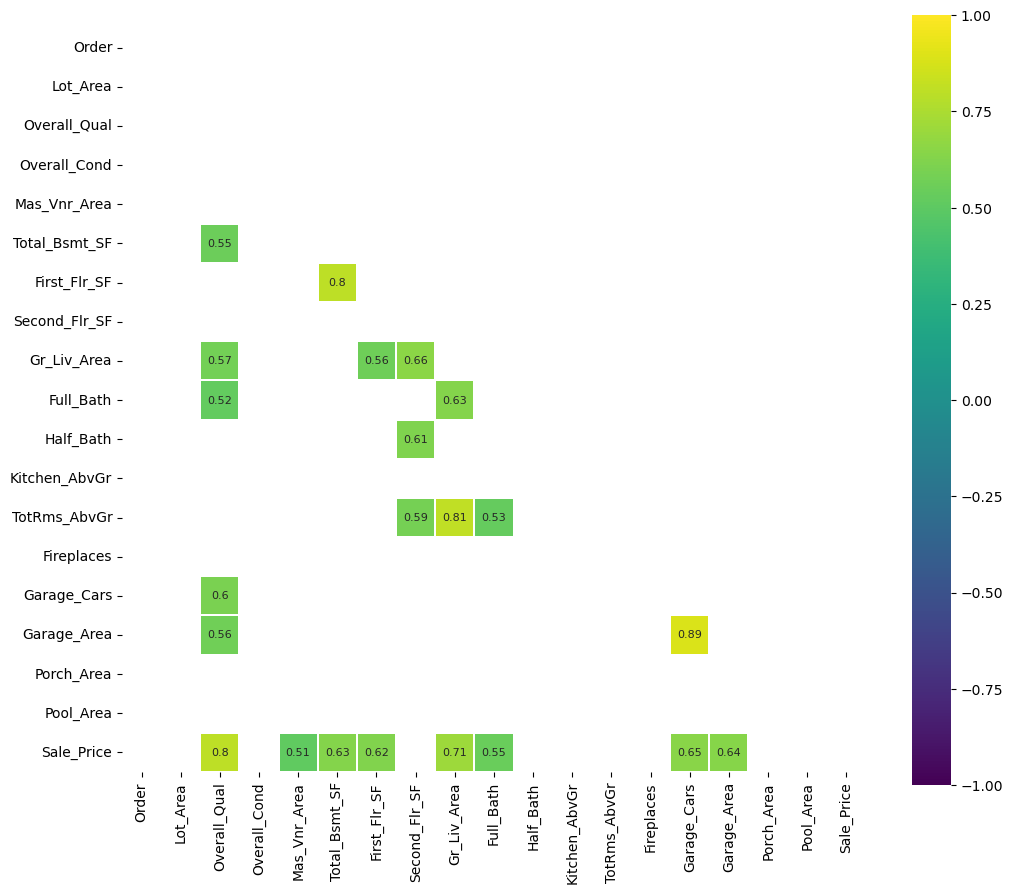

In [13]:
corr = housing.corr()
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Only show the strong correlations
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='viridis',
            mask=mask,
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True);

## Cleaning the data

Can't have any NaNs

In [53]:
# Checking for Null values
housing.isnull().sum(axis = 0)

Order            0
Lot_Area         0
Street           0
Lot_Config       0
Neighborhood     0
Overall_Qual     0
Overall_Cond     0
Mas_Vnr_Area     0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Gr_Liv_Area      0
Full_Bath        0
Half_Bath        0
Kitchen_AbvGr    0
TotRms_AbvGr     0
Fireplaces       0
Garage_Cars      0
Garage_Area      0
Porch_Area       0
Pool_Area        0
Sale_Price       0
dtype: int64

In [54]:
# Filling them with the median column value

housing['Mas_Vnr_Area'] = (housing['Mas_Vnr_Area']
                           .fillna(housing['Mas_Vnr_Area']
                                   .median()))
housing['Total_Bsmt_SF'] = (housing['Total_Bsmt_SF']
                            .fillna(housing['Total_Bsmt_SF']
                                    .median()))
housing['Garage_Cars'] = (housing['Garage_Cars']
                          .fillna(housing['Garage_Cars']
                                  .median()))
housing['Garage_Area'] = (housing['Garage_Area']
                          .fillna(housing['Garage_Area']
                                  .median()))

## Splitting the data

In [22]:
from sklearn.model_selection import train_test_split

In [55]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   Lot_Area       2930 non-null   int64  
 2   Street         2930 non-null   object 
 3   Lot_Config     2930 non-null   object 
 4   Neighborhood   2930 non-null   object 
 5   Overall_Qual   2930 non-null   int64  
 6   Overall_Cond   2930 non-null   int64  
 7   Mas_Vnr_Area   2930 non-null   float64
 8   Total_Bsmt_SF  2930 non-null   float64
 9   First_Flr_SF   2930 non-null   int64  
 10  Second_Flr_SF  2930 non-null   int64  
 11  Gr_Liv_Area    2930 non-null   int64  
 12  Full_Bath      2930 non-null   int64  
 13  Half_Bath      2930 non-null   int64  
 14  Kitchen_AbvGr  2930 non-null   int64  
 15  TotRms_AbvGr   2930 non-null   int64  
 16  Fireplaces     2930 non-null   int64  
 17  Garage_Cars    2930 non-null   float64
 18  Garage_A

In [89]:
# x-variables
x_var = ['Order',
         'Lot_Area',
         #'Street',
         #'Lot_Config',
         #'Neighborhood',
         'Overall_Qual',
         'Overall_Cond',
         'Mas_Vnr_Area',
         'Total_Bsmt_SF',
         'First_Flr_SF',
         'Second_Flr_SF',
         'Gr_Liv_Area',
         'Full_Bath',
         'Half_Bath',
         'Kitchen_AbvGr',
         'TotRms_AbvGr',
         'Fireplaces',
         'Garage_Cars',
         'Garage_Area',
         'Porch_Area',
         'Pool_Area']

In [61]:
x_var = ['Overall_Qual', 'Mas_Vnr_Area']

In [90]:
y_data = housing.loc[ : , 'Sale_Price']
x_data = housing.loc[ : , x_var]

Splitting training and test-data

In [91]:
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

## Creating a model


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
# Model initialization
regression_model = LinearRegression()

In [66]:
# Fit the data(train the model)
regression_model.fit(x_train, y_train)

LinearRegression()

In [80]:
# Predict
y_predicted = regression_model.predict(x_test)

In [78]:
y_predicted = regression_model.predict(pd.DataFrame({'Overall_Qual': [9],
                                                     'Mas_Vnr_Area': [1000]}))
print(y_predicted)

[381158.55766939]


In [ ]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

### Plotting actual vs predicted

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

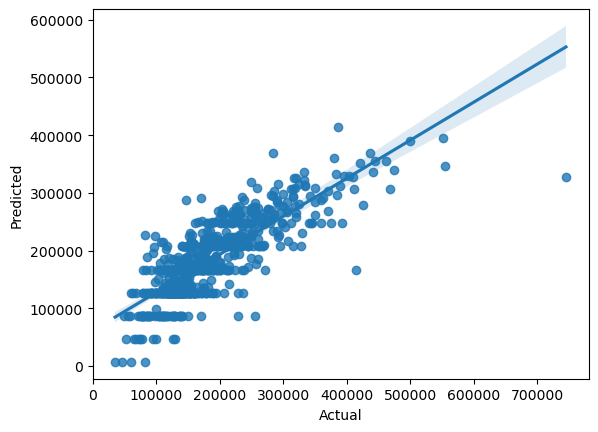

In [81]:
output = pd.DataFrame({'Actual': y_test,
                       'Predicted': y_predicted})
sns.regplot(x="Actual", y="Predicted", data=output)

## Ordinal Encoding

In [82]:
from sklearn.preprocessing import OrdinalEncoder

In [83]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   Lot_Area       2930 non-null   int64  
 2   Street         2930 non-null   object 
 3   Lot_Config     2930 non-null   object 
 4   Neighborhood   2930 non-null   object 
 5   Overall_Qual   2930 non-null   int64  
 6   Overall_Cond   2930 non-null   int64  
 7   Mas_Vnr_Area   2930 non-null   float64
 8   Total_Bsmt_SF  2930 non-null   float64
 9   First_Flr_SF   2930 non-null   int64  
 10  Second_Flr_SF  2930 non-null   int64  
 11  Gr_Liv_Area    2930 non-null   int64  
 12  Full_Bath      2930 non-null   int64  
 13  Half_Bath      2930 non-null   int64  
 14  Kitchen_AbvGr  2930 non-null   int64  
 15  TotRms_AbvGr   2930 non-null   int64  
 16  Fireplaces     2930 non-null   int64  
 17  Garage_Cars    2930 non-null   float64
 18  Garage_A

In [85]:
housing['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

In [86]:
housing['Lot_Config'].value_counts()

Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot_Config, dtype: int64

In [87]:
housing['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [95]:
# x-variables
x_var = ['Order',
         'Lot_Area',
         'Street',
         'Lot_Config',
         'Neighborhood',
         'Overall_Qual',
         'Overall_Cond',
         'Mas_Vnr_Area',
         'Total_Bsmt_SF',
         'First_Flr_SF',
         'Second_Flr_SF',
         'Gr_Liv_Area',
         'Full_Bath',
         'Half_Bath',
         'Kitchen_AbvGr',
         'TotRms_AbvGr',
         'Fireplaces',
         'Garage_Cars',
         'Garage_Area',
         'Porch_Area',
         'Pool_Area']

In [96]:
y_data = housing.loc[ : , 'Sale_Price']
x_data = housing.loc[ : , x_var]

In [105]:
from sklearn.preprocessing import OrdinalEncoder

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder = OrdinalEncoder()
x_data[object_cols] = ordinal_encoder.fit_transform(x_data[object_cols])

In [106]:
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [107]:
regression_model.fit(x_train, y_train)

y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 8.000000e-01  6.700000e-01  2.077387e+04  3.870000e+02  3.618700e+02
  2.174026e+04  2.402600e+03  3.983000e+01  1.664000e+01  4.548000e+01
  2.855000e+01 -3.420000e+00  8.873070e+03  6.414610e+03 -2.384274e+04
  8.179200e+02  5.419750e+03  9.552340e+03  2.643000e+01  2.348000e+01
 -7.391000e+01]
Intercept: -112402.5
Root mean squared error:  1204128108.023
R2 score:  0.815


## One-Hot encoding

In [108]:
from sklearn.preprocessing import OneHotEncoder

In [180]:
y_data = housing.loc[ : , 'Sale_Price']
x_data = housing.loc[ : , x_var]

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)

In [181]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data[object_cols]))

In [182]:
# One-hot encoding removed index; put it back
OH_cols.index = x_data.index

In [183]:
# Ensure we have proper column names
OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1, inplace=True)

In [184]:
# Remove categorical columns (will replace with one-hot encoding)
num_X = x_data.drop(object_cols, axis=1)

In [185]:
# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

In [186]:
x_train, x_test, y_train, y_test = train_test_split(
            OH_X, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [187]:
regression_model.fit(x_train, y_train)

y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 1.190000e+00  6.200000e-01  1.413741e+04  5.449560e+03  2.650000e+01
  1.466000e+01  2.582000e+01  1.125000e+01  1.453000e+01  6.083850e+03
  5.602220e+03 -1.726262e+04  1.380900e+03  5.745580e+03  6.786090e+03
  2.132000e+01  2.586000e+01 -5.037000e+01 -8.498010e+03  8.498010e+03
 -5.046400e+02  1.261867e+04 -7.788740e+03 -6.807830e+03  2.482540e+03
 -2.723730e+03 -2.526842e+04 -3.722614e+04 -1.694124e+04 -1.258533e+04
  2.840080e+03  1.022288e+04 -2.006867e+04 -1.546480e+03 -7.119230e+03
  7.391467e+04 -2.564878e+04  0.000000e+00 -1.545206e+04 -8.006070e+03
 -1.531886e+04 -2.258556e+04 -2.103953e+04  4.960892e+04  5.802061e+04
 -2.846485e+04 -2.314194e+04 -1.304244e+04 -5.042210e+03  1.544855e+04
  6.915438e+04  1.574722e+04  6.264260e+03]
Intercept: -57130.37
Root mean squared error:  1050621609.043
R2 score:  0.838


## Feature importance

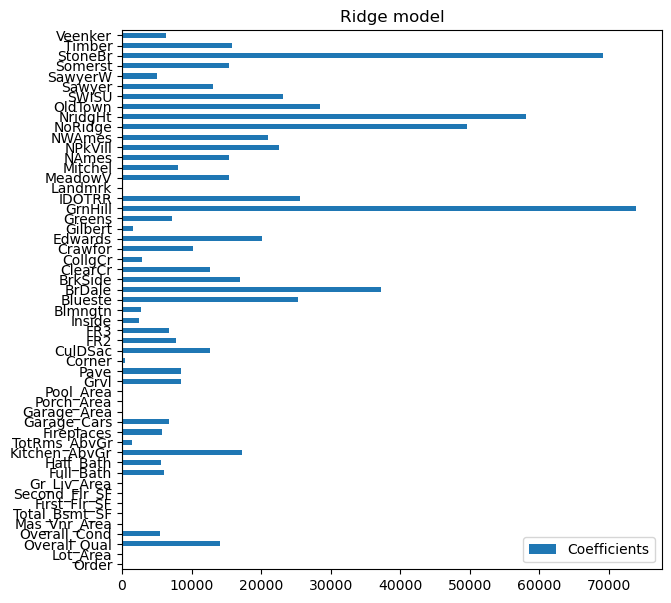

In [188]:
coefs = pd.DataFrame(
   np.abs(regression_model.coef_),
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Need to scale first in order to compare the features

In [193]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())

model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

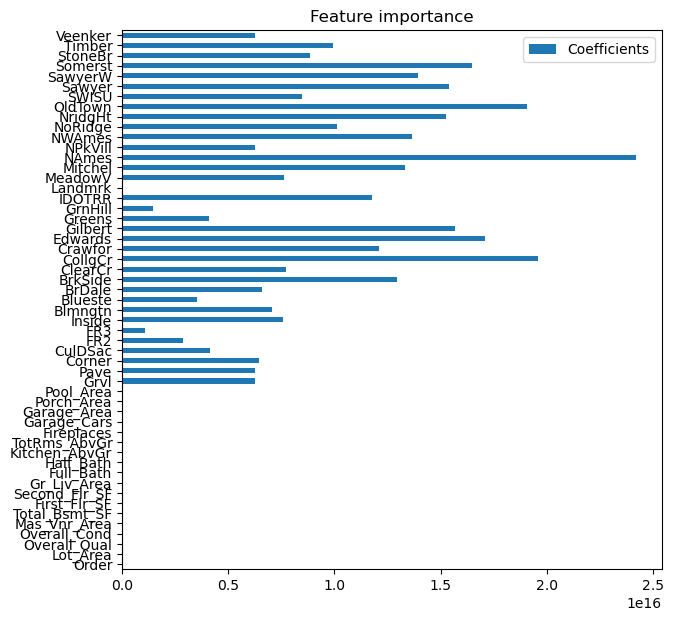

In [198]:
coefs = pd.DataFrame(
   np.abs(model[1].coef_),
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)